In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sys, os

In [2]:
sys.path.append(os.path.abspath('..'))

In [3]:
from QubitRBM.rbm import *
from QubitRBM.optimize import *
from QubitRBM.exact_gates import H

In [4]:
nv = 10
nh = 4*nv

In [5]:
logpsi = RBM(nv, nh)

In [6]:
logpsi.rand_init_weights()

In [7]:
n = np.random.randint(low=0, high=nv)

In [8]:
n

6

In [9]:
psi0 = logpsi.get_state_vector(log=False, normalized=True)
phi = H(n=n, n_qubits=nv).dot(psi0)

Initial fidelity:

In [15]:
utils.exact_fidelity(psi0, phi)

0.50578948549631108644

Run the optimizer and track the progress:

In [10]:
a, b, W, fidelities = hadamard_optimization(logpsi, n, tol=1e-6, mcmc_params=(500,100,1),
                                            fidelity='mcmc', verbose=True)

Iteration 91 | Fidelity = 0.8952097241394416 | lr = 0.008109610578538408
Iteration 181 | Fidelity = 0.9449876006892197 | lr = 0.0065917389524432135
Iteration 268 | Fidelity = 0.9843782235568965 | lr = 0.005395106225151276
Iteration 355 | Fidelity = 0.9919885641152445 | lr = 0.0044157044735331245


Final fidelity:

In [12]:
logpsi.set_params(a, b, W)

In [13]:
psi = logpsi.get_state_vector(log=False, normalized=True)

In [14]:
utils.exact_fidelity(psi, phi)

0.99597564784274095206

Plot the optimizer progress:

Text(0, 0.5, '$\\vert \\langle \\psi _\\theta \\vert \\phi \\rangle \\vert^2 $')

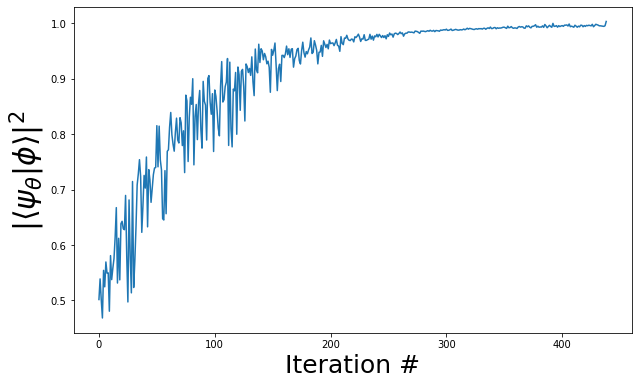

In [11]:
fig, ax = plt.subplots(figsize=[10,6])

ax.plot(fidelities)
ax.set_xlabel('Iteration #', fontsize=25)
ax.set_ylabel(r'$\vert \langle \psi _\theta \vert \phi \rangle \vert^2 $', fontsize=30)